In [ ]:
import pandas as pd
import numpy as np
import sklearn

In [ ]:
import pandas as pd
df=pd.read_csv("/content/Iris (1).csv")

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df=df.drop(['Id'], axis=1)

In [ ]:
correlacion=df.corr()
alta_corr=np.where((correlacion>0.95)&(correlacion<1))
baja_corr=np.where((correlacion<-0.95)&(correlacion>-1))

<ipython-input-239-7bd2e84af921>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion=df.corr()


In [ ]:
#columns_to_scale = df.columns[:4]

# Initialize the scaler
#scaler = StandardScaler()

# Apply standard scaling only to the selected columns
#df_scaled = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
#df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

r cuadrada solo pare regresion lineal

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df.iloc[:, :4],df.iloc[:, 4], test_size=0.5, random_state=42)

### ANALISIS DISCRIMINANTE

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
adl_model=LinearDiscriminantAnalysis()
adl_model.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred=adl_model.predict(x_test)
print(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test, y_pred)
print(exactitud)

0.9866666666666667


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  1, 22]])

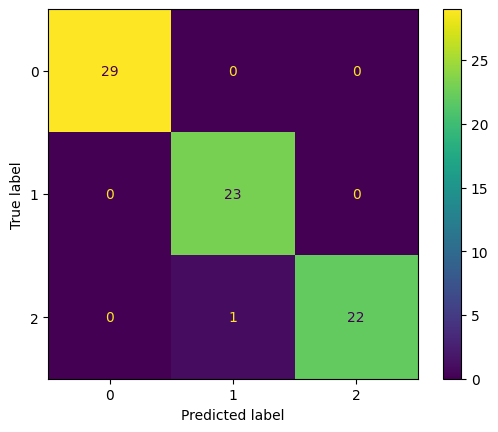

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

### BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred=nb.predict(x_test)
print(y_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginic

In [ ]:
print("exactitud del modelo", nb.score(x_test,y_test))

exactitud del modelo 0.9866666666666667


In [ ]:
# aqui comparo manualmente las prediccion y las de prueba para verificar que si tenga 100% de exactitud.
for pred, true in zip(y_pred, y_test.values):
    print(f"Predicted: {pred} | True: {true} | Match: {pred == true}")

Predicted: Iris-versicolor | True: Iris-versicolor | Match: True
Predicted: Iris-setosa | True: Iris-setosa | Match: True
Predicted: Iris-virginica | True: Iris-virginica | Match: True
Predicted: Iris-versicolor | True: Iris-versicolor | Match: True
Predicted: Iris-versicolor | True: Iris-versicolor | Match: True
Predicted: Iris-setosa | True: Iris-setosa | Match: True
Predicted: Iris-versicolor | True: Iris-versicolor | Match: True
Predicted: Iris-virginica | True: Iris-virginica | Match: True
Predicted: Iris-versicolor | True: Iris-versicolor | Match: True
Predicted: Iris-versicolor | True: Iris-versicolor | Match: True
Predicted: Iris-virginica | True: Iris-virginica | Match: True
Predicted: Iris-setosa | True: Iris-setosa | Match: True
Predicted: Iris-setosa | True: Iris-setosa | Match: True
Predicted: Iris-setosa | True: Iris-setosa | Match: True
Predicted: Iris-setosa | True: Iris-setosa | Match: True
Predicted: Iris-versicolor | True: Iris-versicolor | Match: True
Predicted: Iri

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  1, 22]])

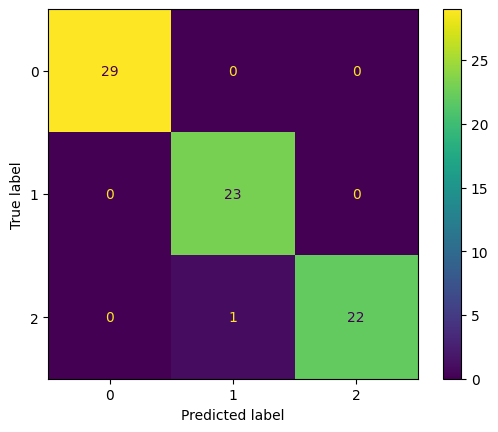

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

regresion logistica

In [ ]:
dummies=pd.get_dummies(df['Species'],prefix='Species')

In [ ]:
df=pd.concat([df,dummies],axis=1)

In [ ]:
df.rename(columns={'Species_Iris-setosa':'Species_setosa'},inplace=True)
df.rename(columns={'Species_Iris-versicolor':'Species_versicolor'},inplace=True)
df.rename(columns={'Species_Iris-virginica':'Species_virginica'},inplace=True)
df.drop('Species',axis=1,inplace=True)

In [ ]:
#escalar los datos entre 0 y 1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_estandar =scaler.fit_transform(df)
df_estandar=pd.DataFrame(df_estandar,columns=df.columns)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df_estandar.iloc[:, :4],df.iloc[:, 4], test_size=0.2, random_state=42)

In [ ]:
from numpy.random.mtrand import logistic
from sklearn.linear_model import LogisticRegression
logistic= LogisticRegression()
logistic.fit(x_train,y_train)
y_predict=logistic.predict(x_test)

In [ ]:
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
modelo= sm.Logit(endog=y_train, exog=x_train)
modelo= modelo.fit()
print(modelo.summary())

         Current function value: inf
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         Species_setosa   No. Observations:                  120
Model:                          Logit   Df Residuals:                      115
Method:                           MLE   Df Model:                            4
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                     inf
Time:                        06:47:17   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -21.8698   5.82e+06  -3.76e-06      1.000   -1.14e+07    1.14e+07
SepalLengthCm    -4.8016    1.9e+07  -2.53e-07      1.000   -

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Max

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[20,  0],
       [ 0, 10]])

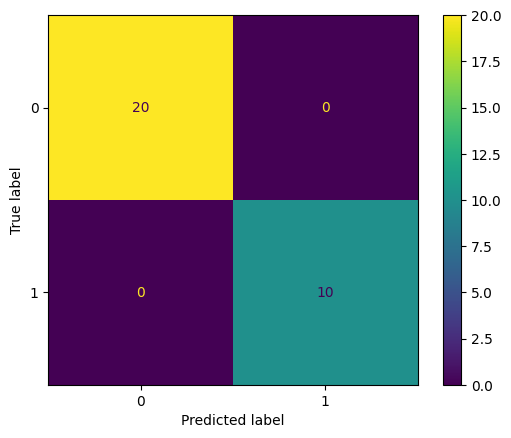

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

cm_display = ConfusionMatrixDisplay(cm).plot()

Antes de ir a la conclusión, quiero explicar los 3 modelos y cuando yo creo que son utiles para diferentes casos.

**Regresión Logística**:
La regresión logística se utiliza para problemas de clasificación binaria, es decir, cuando quieres predecir si algo pertenece a una de dos categorías mutuamente excluyentes
Ventajas: Es una técnica simple y efectiva, fácil de entender y de implementar. Puede manejar características continuas o categóricas y es robusta incluso cuando algunas de las suposiciones no se cumplen.

**Análisis Bayesiano**:

El análisis bayesiano es útil cuando tienes información de los datos que puede ayudar a mejorar tus predicciones y cuando estas dispuesto a usar un modelo mas tardado y complejo.
Ventajas: Permite incorporar información previa en el modelo, lo que es útil cuando se dispone de información experta o datos históricos. Puede ser especialmente útil en situaciones donde las muestras son escasas. Sin embargo, puede ser computacionalmente costoso.

**Análisis Discriminante:**

El análisis discriminante es una técnica que se utiliza principalmente para la clasificación, pero a diferencia de la regresión logística, puede manejar problemas de clasificación multiclase (más de dos categorías).
Ventajas: es apropiado cuando tienes múltiples clases y deseas encontrar una forma efectiva de separarlas en función de las características disponibles.

**Conclusion**
los 3 modelos tienen un puntaje de precision perfecto lo que por un lado es bueno pero por otro lado es probable que algo este mal con los datos. Comparando los 3 modelos, el de regresion logistica tiene una separacion perfecta, lo cual sginifica que las variables predictoras pueden predecir de manera precisa y completa la variable de resultado en un problema de clasificación binaria. Esto yo creo es porque la separación puede estar relacionada con el hecho de que estoy tratando de aplicar regresión logística a un problema de clasificación multiclase, donde tengo tres clases (Setosa, Versicolor y Virginica). Por esto creo que los otros dos son mejores opciones para esta base de datos, por mas que tambien dan un accuracy score perfecto. Ya trate estandarizando los datos con los 3 modelos y de igual forma me dio 1.

cambiando el test size a 0.5 en el de bayes y analisis discriminatorio, refiriendo a que el 50% del conjunto de datos se destinará al conjunto de prueba, mientras que el otro 50% se utilizará como conjunto de entrenamiento. (antes se usaba el 80% de prueba). Haciendo esto el modelo de analisis discriminatorio ya no nos da un perfect score, mientras el de Bayes si nos da un 1, lo que nos ayuda a concluir que el de Bayes es el mejor modelo para esta base de datos.

Álvaro Morán Errejón